Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
d=pd.read_csv("C:/Users/91636/Desktop/Projects/Zomato Data Analysis/zomato.csv")

In [29]:
print(d)

                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stag

In [30]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [31]:
print(d.shape)

(51717, 17)


In [32]:
print(d.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [33]:
print(d.dtypes)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [34]:
d.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [35]:
d.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [83]:
columns_to_drop = ['menu_item','reviews_list','cuisines','phone','address','url']
df=d.drop(columns = columns_to_drop, axis=True) 

In [84]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [85]:
df['rate'] = df['rate'].replace(['NAN','NEW'], '0')

In [86]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [87]:
df['rate'] = df['rate'].astype(float)

In [88]:
df['rate'] = df['rate'].fillna(0)

In [89]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [90]:
df['name'] = df['name'].str.split(' - ').str[0].str.strip()

In [91]:
df['name']

0                           jalsa
1                  spice elephant
2                 san churro cafe
3           addhuri udupi bhojana
4                   grand village
                   ...           
51712                  best brews
51713    vinod bar and restaurant
51714                      plunge
51715                       chime
51716                    the nest
Name: name, Length: 51717, dtype: object

In [92]:
df['name'] = df['name'].str.lower() 

In [93]:
df['name'].unique()

array(['jalsa', 'spice elephant', 'san churro cafe', ..., 'nawabs empire',
       'seeya restaurant', 'plunge'], dtype=object)

In [94]:
df['location'] = df['location'].str.split(',').str[0].str.strip() 

In [95]:
df = df.rename(columns = {'listed_in(city)' : 'rest_city'})

In [108]:
df

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type),rest_city
0,jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.000000,Buffet,Banashankari
1,spice elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.000000,Buffet,Banashankari
2,san churro cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.000000,Buffet,Banashankari
3,addhuri udupi bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.000000,Buffet,Banashankari
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,600.000000,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,best brews,No,No,3.6,27,Whitefield,Bar,416.630112,Pubs and bars,Whitefield
51713,vinod bar and restaurant,No,No,0.0,0,Whitefield,Bar,600.000000,Pubs and bars,Whitefield
51714,plunge,No,No,0.0,0,Whitefield,Bar,416.630112,Pubs and bars,Whitefield
51715,chime,No,Yes,4.3,236,ITPL Main Road,Bar,416.630112,Pubs and bars,Whitefield


In [111]:
most_frequent = df['rest_type'].mode()[0]
df['rest_type'] = df['rest_type'].fillna(most_frequent)
df = df.drop('dish_liked', axis=1, errors='ignore')


In [112]:
print(df.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'approx_cost(for two people)', 'listed_in(type)',
       'rest_city'],
      dtype='object')


Text(0, 0.5, 'Online Order Percentage')

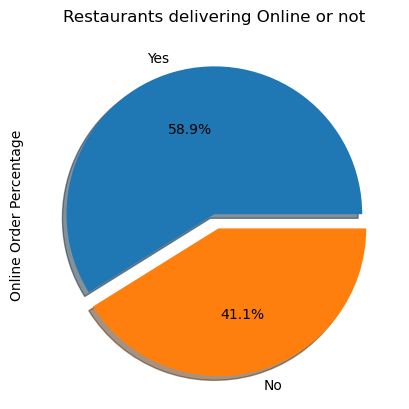

In [113]:
df['online_order'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.1], shadow=True)
plt.title('Restaurants delivering Online or not')
plt.ylabel('Online Order Percentage')

Text(0, 0.5, 'book percentage')

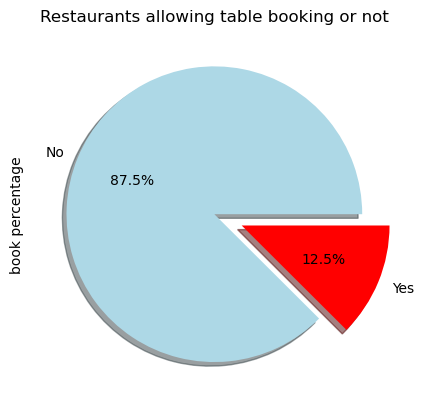

In [114]:
colors = [ 'lightblue' , 'red']
df['book_table'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0, 0.2], shadow=True, colors =colors)

plt.title('Restaurants allowing table booking or not')
plt.ylabel('book percentage')

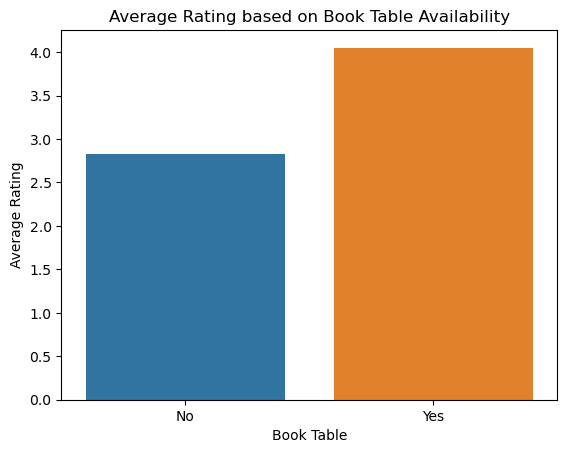

In [115]:
avg_ratings = df.groupby('book_table')['rate'].mean().reset_index()

sns.barplot(x='book_table', y='rate', data=avg_ratings)

plt.xlabel('Book Table')
plt.ylabel('Average Rating')
plt.title('Average Rating based on Book Table Availability')
plt.show()


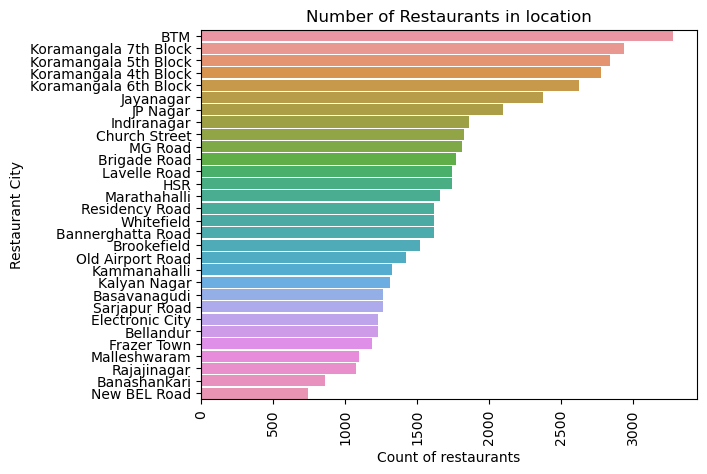

In [119]:
city_counts = df['rest_city'].value_counts().reset_index()
city_counts.columns = ['rest_city', 'count']

#Create our bar plot
sns.barplot(y='rest_city', x='count', data=city_counts, width =0.9)

plt.xlabel('Count of restaurants')
plt.ylabel('Restaurant City')
plt.title('Number of Restaurants in location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

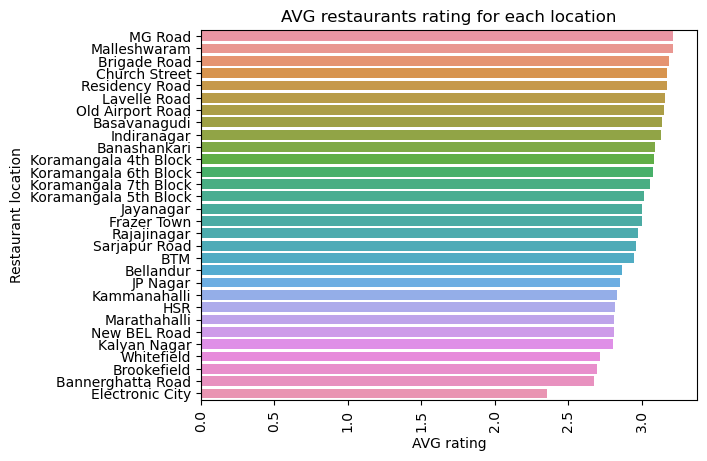

In [121]:
avg_ratings = df.groupby('rest_city')['rate'].mean().reset_index()
avg_ratings_sorted = avg_ratings.sort_values(by='rate', ascending=False)

sns.barplot(y='rest_city', x='rate', data=avg_ratings_sorted, width =0.8)

plt.xlabel('AVG rating')
plt.ylabel('Restaurant location')
plt.title('AVG restaurants rating for each location')
plt.xticks(rotation=90)  
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Quick Bites'),
  Text(1, 0, 'Casual Dining'),
  Text(2, 0, 'Cafe'),
  Text(3, 0, 'Delivery'),
  Text(4, 0, 'Dessert Parlor'),
  Text(5, 0, 'Takeaway, Delivery'),
  Text(6, 0, 'Casual Dining, Bar'),
  Text(7, 0, 'Bakery'),
  Text(8, 0, 'Beverage Shop'),
  Text(9, 0, 'Bar')])

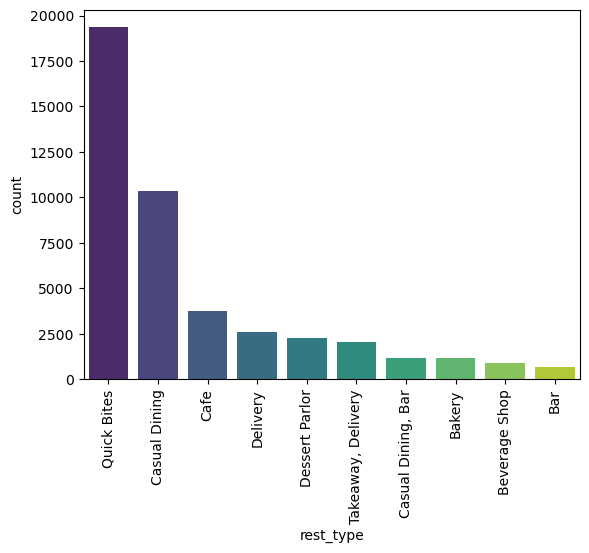

In [122]:
#get the top 10 restaurant types
top_rest_types = df['rest_type'].value_counts().head(10)

# Create our count plot to know which type is most common
sns.countplot(x='rest_type', data= df, order = top_rest_types.index , palette='viridis')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Percentage of total')

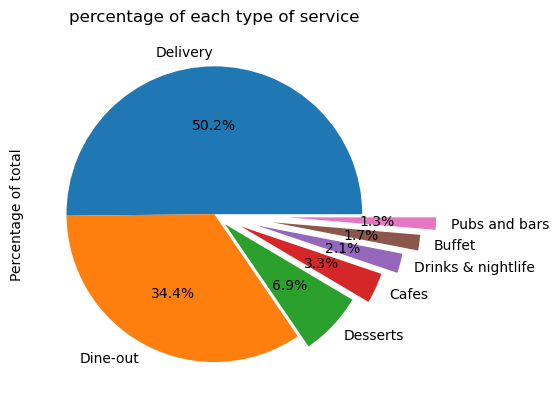

In [123]:
#make a percentage of each type of service
df['listed_in(type)'].value_counts().plot(kind ='pie', autopct = '%0.1F%%', explode =[0,0,0.1,0.2,0.3,0.4,0.5] )

plt.title('percentage of each type of service')
plt.ylabel('Percentage of total')